## 회귀 모델을 사용해서 지속적인 결과를 예측하기

#### 선형 회귀 분석
+ 선형 회귀는 가장 기본적인 회귀 모델로, 기본 아이디어는 __특징의 선형 조합을 사용해 목표 변수를 설명__하는 것이다 
+ 간단하게 설명하기 위해 주가를 예측하는 경우를 예로 들면, 오늘의 주가와 어제의 주가 특성을 각각 f1, f2라고 했을 때, 선형 회귀의 목표는 다음과 같이 내일의 주가를 예측할 수 있도록 두 개의 가중 계수 w1과 w2를 학습하는 것이다.
  + __hat(y) = w1f1 + w2f2__. 여기서 __hat(y)__는 내일 주가 y의 예측 값이다. 
    + [hat 개념 링크 1](http://envyang.tistory.com/16)
    + [hat 개념 링크 2](https://m.blog.naver.com/PostView.nhn?blogId=vucccooiz5&logNo=140067554891&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F)
  + 여기서 과거의 더 많은 주가 표본을 갖고 hat(y)를 구현할 수 있다. 모든 특징이 가중치 계수를 갖는다.
    + __hat(y) = w1f1 + ... + wmfm = Sigma(j = 1 ~ M)wjfj__.
  + 우리가 근삿값을 구하려고 시도할 때, y 값이 원점을 통과하지 않는다면 원점으로부터 오프셋 hat(y)를 적용해야 한다. 따라서 임의의 특징 값에 의존하지 않는 부가적인 Weight coefficient(가중 계수)를 추가하는 것이 통상적이며, 가중 계수는 바이어스 항처럼 작용한다. 
    + __hat(y) = wo + Sigma(j = 1 ~ M)wjfj__. 여기서 wo가 바이어스 항으로 작용할 수 있도록 하기 위해 f0가 1로 설정된 상황이다.
  + 선형 회귀의 목표는 가능한 한 ground truth(실측) 값을 근사 예측하기 위해 일련의 가중 계수를 만드는 것이다.
  + 모델의 정확도를 명시적으로 사용하는 대신 cost(비용) 함수 또는, loss(손실) 함수를 사용할 수 있다.
    + 가장 일반적으로 사용되는 비용 함수는 mean squared error(평균 제곱 오차)이며, 각 데이터 포인트 i에 대해 목표 출력 값 yi 대비 예측 값 hat(yi)를 비교하고 평균값을 구해서 (yi - hat(yi))^2 오차를 계산한다.
     
  
### 선형 회귀 분석 방법을 사용해 보스턴 주택 가격 예측하기  
+ 보스턴 주택 가격 데이터 세트로 알려진 유명한 머신 러닝 데이터 세트 중 하나에 적용할 수 있는 간단한 모델을 작성해보자.
+ 목표는 범죄율, 재산세 세율, 고용 센터와의 거리, 고속도로 접근 가능성 등의 정보를 사용해 주택 가치를 예측해본다.

In [3]:
import numpy as np
import cv2
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection as modsel
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# 데이터 세트 불러오기
boston = datasets.load_boston()

# dir() 내장 함수에 객체를 넣으면, 그 객체가 어떤 메소드와 변수를 갖고 있는지 나열함.
print(dir(boston))
"""DESCR : 데이터 세트에 대한 여러 정보들이 들어있음.
data : 모든 데이터,
feature_names : 모든 특징의 이름
target : 모든 타깃 값"""

['DESCR', 'data', 'feature_names', 'target']


#####     
  
  + 데이터 세트에는 총 506개의 데이터 포인트가 있으며, 각 데이터 포인트에는 13개의 특징이 있다.
  

In [4]:
boston.data.shape

(506, 13)

#####   

  + 모델 훈련하기

In [5]:
linreg = linear_model.LinearRegression()

#####   
  + 데이터를 훈련 세트와 테스트 세트로 분리.

In [7]:
#테스트를 위해 10~ 30% 사이를 예약하는게 좋다. 여기에서는 test_size 인수를 사용해 10%를 선택했다.
x_train, x_test, y_train, y_test = modsel.train_test_split(boston.data, boston.target, test_size = 0.1, random_state = 42)

#####  
  + train 시키고(fit 함수 사용)난 뒤, 실제 주택 가격 y_train을 우리의 예측 linreg.predict(x_train)과 비교해 예측의 평균 제곱 오차를 구해볼 수도 있고, R^2(coefficient of determination. 결정 계수)를 구할 수도 있다.

In [17]:
linreg.fit(x_train, y_train)

#평균 제곱 오차
print(metrics.mean_squared_error(y_train, linreg.predict(x_train)))

#coefficient of determination
score = linreg.score(x_train, y_train)
print(score)

22.739484154236614
0.7374934091901197


#####   
  + 모델 테스트하기

In [18]:
y_pred = linreg.predict(x_test)

err = metrics.mean_squared_error(y_test, y_pred)
print(err)

15.010997321630049


위의 값을 살펴보면, mean squared error가 훈련 세트보다 테스트 세트에서 더 정확성이 높다는 것을 알 수 있다. 이 값만으로 모델이 얼마나 좋은지 이해하기 어려우니, 데이터를 플로팅해서 확인해보도록 하자.

#####   
  + 데이터 플로팅


Text(0,0.5,'target value')

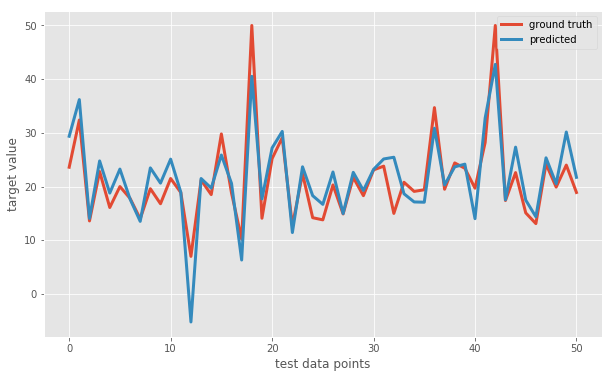

In [14]:
plt.figure(figsize = (10,6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc = 'best')
plt.xlabel('test data points')
plt.ylabel('target value')

#####   
  + coeffiecient of determination(결정 계수)를 통해 분산 양을 공식화 하고 플로팅 할 수 있다. 

Text(-5,45,'MSE = 15.011')

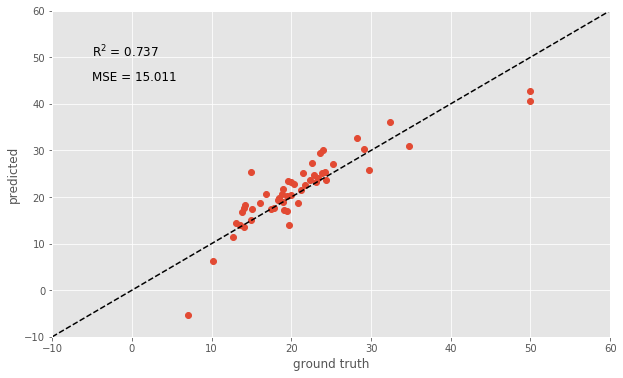

In [28]:
plt.figure(figsize = (10,6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')
scorestr = r'R$^2$ = %.3f' %score
errstr = 'MSE = %.3f' %err
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12)


생성된 그림에서 모델 적합성을 플로팅한 결과를 볼 수 있다. 

  
모델이 완벽하다면 y_pred가 항상 y_true와 같을 것이기 때문에 모든 데이터 포인트는 대각선으로 표시될 수 있다.
 
  
대각선으로부터의 편차는 모델이 약간의 오차를 갖고 있거나, 모델이 설명하기 어렵게 데이터에 약간의 차이가 있음을 나타낸다. 

####   
  + __Overfitting(과적합)__ 현상 : 훈련 데이터에만 제대로 적응된 상태로, 모델이 새로운 데이터의 적용에 대해 제대로 반응하지 못하는 현상. 주로 다음의 상황에서 많이 발생한다.
    1. 매개변수가 많고 표현력이 높은 모델
    2. 훈련 데이터가 적은 모델
  + 이 현상을 줄이기 위한 일반적인 기법을 __Regularization(정규화)__이라고 한다. 범용성을 갖도록 처리해주는 것이다.
  + 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문에, 가중치가 클 수록 큰 페널티를 부과하는게 일반적이고, 가장 일반적으로 사용되는 규칙은 다음과 같다.
    + __L1 정규화__ : 비용 함수에 가중치 파라미터의 합을 더하는 형태이다. 각 가중치 파라미터의 절대 값을 더하는데, 이때 적절한 가중치 파라미터 lambda를 곱한다. 이렇게 새로 추가되는 항을 __L1 penalty__라고 부른다. 이런 방식의 선형회귀 분석을 __Lasso regression(라쏘 회귀)__라고 한다. 가중치 벡터의 L1 norm을 기반으로 하고, L1 norm은 맨해튼 거리라고도 한다.
    + __L2 정규화__ : 비용 함수에 가중치 파라미터의 합을 더하는 형태이다. L1 정규화의 효과가 그리 크지 않기 때문에 사용됐다. 모든 특성 가중치를 제곱한 값의 합계를 더하고 lambda를 곱한다. 새로 추가되는 항을 __L2 penalty__라고 부른다. 이런 방식의 선형회귀 분석을 __Ridge regression(릿지 혹은 능형 회귀)__라고 한다. 가중치 벡터의 L2 norm을 기반으로 하고, L2 norm은 유클리드 거리라고 한다.
      + __람다__는 정규화의 강도를 조절하는 하치퍼파라미터로, 크게 설정할수록 가중치에 큰 페널티가 부과된다.
    
![L1, L2 정규화](../image_for_md/Regularization.png "L1, L2 정규화 식")
[출처](http://astralworld58.tistory.com/64)

+ L1 정규화를 사용한 Lasso regression은 __Lasso()__ 함수를 사용한다.
+ L2 정규화를 사용한 Ridge regression은 __Ridge()__ 함수를 사용한다.

In [33]:
#기존에 사용한 아래의 문법을 교체해야 한다.
#linreg = linerar_model.LinearRegression()

#L1
lassoreg = linear_model.Lasso()

#L2
ridgereg = linear_model.Ridge()

[실제 적용한 것에 대한 예](https://github.com/woorimlee/opencv-machine-learning/blob/master/notebooks/03.04-Applying-Lasso-and-Ridge-Regression.ipynb)
